In [168]:
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
import re

In [148]:
driver = webdriver.Chrome()

In [149]:
url= "https://www.amazon.in/"
driver.get(url)

In [150]:
inputU = input('please enter product here--->')

please enter product here--->headphones


In [151]:
search_bar = driver.find_element(By.XPATH,'//*[@id="twotabsearchtextbox"]')    
search_bar.send_keys(inputU)       
search_button = driver.find_element(By.XPATH,'//*[@id="nav-search-submit-button"]')    
search_button.click()       

In [152]:
productName=[]

In [154]:
PName=driver.find_elements(By.XPATH,"//span[@class='a-size-medium a-color-base a-text-normal']")
for i in PName:
    if i.text is None :
        productName.append("--") 
    else:
        productName.append(i.text)
print(len(productName),productName)

23 ['Sony PS5 Pulse 3D Gaming Wireless Over Ear Headset with Dual Noise-Cancellation Mic, 3.5mm Jack, Tempest 3D audio, USB Type-C charging, 12H Battery (Black)', 'HAMMER Bash Max Over The Ear Wireless Bluetooth Headphones with Mic, Touch Control, Deep Bass, Upto 18 Hours Playtime, Bluetooth 5.3, Workout/Travel (Cool Grey)', 'Sony WH-CH520, Wireless On-Ear Bluetooth Headphones with Mic, Upto 50 Hours Playtime, DSEE Upscale, Multipoint Connectivity/Dual Pairing,Voice Assistant App Support for Mobile Phones (Blue)', 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'ZEBRONICS Thunder Bluetooth 5.3 Wireless Headphones with 60H Backup, Gaming Mode, Dual Pairing, ENC, AUX, Micro SD, Voice Assistant, Comfortable Earcups, Call Function(Sea Green)', 'JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)', 'Logitech H111 Wired On Ear Headphones With Mic Black', 'Sony WH-CH520, Wireless On-Ear Bluetoot

Q: 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then
scrape all the products available under that product name. Details to be scraped are: "Brand
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 


In [155]:
start_page = 0
end_page = 3
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-no-outline"]')
        
       
        for url in page_urls:
            url = url.get_attribute('href')    
            if url[0:4]=='http':               
                urls.append(url)               
        print("Product urls of page {} has been scraped.".format(page+1))
        
        
        nxt_button = driver.find_element(By.XPATH,'//li[@class="a-last"]/a')      
        if nxt_button.text == 'Next→':                                            
            nxt_button.click()                                                    
            time.sleep(5)                                                            
        elif driver.find_element(By.XPATH,'//li[@class="a-disabled a-last"]/a').text == 'Next→':    
            print("No new pages exist. Breaking the loop")  
            break
            
    except StaleElementReferenceException as e:               
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')      
        driver.get(next_page)                               

Product urls of page 1 has been scraped.


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//li[@class="a-last"]/a"}
  (Session info: chrome=121.0.6167.161); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00891673+52979]
	(No symbol) [0x00817961]
	(No symbol) [0x006FDD3D]
	(No symbol) [0x00735FBB]
	(No symbol) [0x007360FB]
	(No symbol) [0x0076CF92]
	(No symbol) [0x00754534]
	(No symbol) [0x0076B3FE]
	(No symbol) [0x00754286]
	(No symbol) [0x0072C063]
	(No symbol) [0x0072CECD]
	GetHandleVerifier [0x00BA8D83+3294723]
	GetHandleVerifier [0x00BE6CC2+3548482]
	GetHandleVerifier [0x00BE1C9C+3527964]
	GetHandleVerifier [0x0092870E+671630]
	(No symbol) [0x00821EB4]
	(No symbol) [0x0081D808]
	(No symbol) [0x0081D92D]
	(No symbol) [0x0080F7E0]
	BaseThreadInitThunk [0x766800F9+25]
	RtlGetAppContainerNamedObjectPath [0x77767BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77767B8E+238]


In [156]:
prod_dict = {}
prod_dict['Brand']=[]
prod_dict['Name']=[]
prod_dict['Rating']=[]
prod_dict['No. of ratings']=[]
prod_dict['Price']=[]
prod_dict['Return/Exchange']=[]
prod_dict['Expected Delivery']=[] 
prod_dict['Availability']=[]
prod_dict['Other Details']=[]
prod_dict['URL']=[]

In [157]:
for url in urls[:4]:
    driver.get(url)                                                        # Loading the webpage by url
    print("Scraping URL = ", url)
    #time.sleep(2)
    
    try:
        brand = driver.find_element(By.XPATH,'//a[@id="bylineInfo"]')      
        prod_dict['Brand'].append(brand.text)
    except NoSuchElementException:
        prod_dict['Brand'].append('-')
    
    try:
        name = driver.find_element(By.XPATH,'//h1[@id="title"]/span')      
        prod_dict['Name'].append(name.text)
    except NoSuchElementException:
        prod_dict['Name'].append('-')
    
    try:
        rating = driver.find_element(By.XPATH,'//span[@id="acrPopover"]')  
        prod_dict['Rating'].append(rating.get_attribute("title"))
    except NoSuchElementException:
        prod_dict['Rating'].append('-')
    
    try:
        n_rating = driver.find_element(By.XPATH,'//a[@id="acrCustomerReviewLink"]/span')     
        prod_dict['No. of ratings'].append(n_rating.text)
    except NoSuchElementException:
        prod_dict['No. of ratings'].append('-')
    
    try:
        price = driver.find_element(By.XPATH,'//span[@id="priceblock_ourprice"]')           
        prod_dict['Price'].append(price.text)
    except NoSuchElementException:
        prod_dict['Price'].append('-')
    try:                                                                                     
        ret = driver.find_element(By.XPATH,'//div[@data-name="RETURNS_POLICY"]/span/div[2]/a')
        prod_dict['Return/Exchange'].append(ret.text)
    except NoSuchElementException:
        prod_dict['Return/Exchange'].append('-')
    try:
        delivry = driver.find_element(By.XPATH,'//div[@id="ddmDeliveryMessage"]/b')         
        prod_dict['Expected Delivery'].append(delivry.text)
    except NoSuchElementException:
        prod_dict['Expected Delivery'].append('-')
    try:
        avl = driver.find_element(By.XPATH,'//div[@id="availability"]/span')                
        prod_dict['Availability'].append(avl.text)
    except NoSuchElementException:
        prod_dict['Availability'].append('-')
    
    try:                                                                                   
        dtls = driver.find_element(By.XPATH,'//ul[@class="a-unordered-list a-vertical a-spacing-mini"]')
        prod_dict['Other Details'].append('  ||  '.join(dtls.text.split('\n')))
    except NoSuchElementException:
        prod_dict['Other Details'].append('-')
    
    prod_dict['URL'].append(url)                                                            
    time.sleep(2)

Scraping URL =  https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo2NTI1MjkwMzc5NTE0MDQ2OjE3MDgwNzMxOTY6c3BfYXRmOjMwMDEyMDMwNjY1OTYzMjo6MDo6&url=%2FPlayStation-Wireless-PlayStation%25C2%25AE5-Noise-Cancellation-Charging%2Fdp%2FB09KRYLYDH%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3J9YZGBE5UEXE%26dib%3DeyJ2IjoiMSJ9.zUOpKvfYGGUxDakT-Y5tsDN_Wp6eStGpGw2kXy-6a63DigUUm2qlMhaBDYCk21Io6_UO7g7zJ8t8hAoSkn6XIWA7HPDpO48aC_QNYdJn6nUD3V8VbOpJk8aE8KfajeQ2xRe24LUGoLo4ZNv7hPSoF4dIWOazxzppGbfYIgeidZ3OJP_hFrpdCx1xsyMYKK7dG4nrIpLfw9d2fVGqpVYJ_fa-9na7LCO3p0E7jxJoqRg.kmXlqPE5zVYWGvaquN0s3kmMTX_KpYG4oDQsvykaGqI%26dib_tag%3Dse%26keywords%3Dheadphones%26qid%3D1708073196%26sprefix%3Dheadphones%252Caps%252C312%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
Scraping URL =  https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo2NTI1MjkwMzc5NTE0MDQ2OjE3MDgwNzMxOTY6c3BfYXRmOjMwMDA3NjIxMTkzMzgzMjo6MDo6&url=%2FHAMMER-Bash-Max-Bluetooth-Headphones%2Fdp%2FB0CBG1YG5F%2Fref%3Dsr_1_2_sspa%3Fcrid%3D3J9YZGBE5UEXE%26dib%3DeyJ2IjoiMSJ

KeyboardInterrupt: 

In [158]:
prod_df = pd.DataFrame.from_dict(prod_dict)
prod_df

,Brand,Name,Rating,No. of ratings,Price,Return/Exchange,Expected Delivery,Availability,Other Details,URL
0,Visit the Sony Store,Sony PS5 Pulse 3D Gaming Wireless Over Ear Hea...,4.3 out of 5 stars,201 ratings,-,-,-,In stock,"Compatibility: PS5, PS4, PS VR, PC, Windows, M...",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


3. Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’

In [79]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import StaleElementReferenceException 
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [80]:
driver = webdriver.Chrome()

In [81]:
url = "https://images.google.com/"

In [82]:
driver.get("https://images.google.com/")

In [83]:
search_bar= driver.find_element(By.NAME,"q")

In [84]:
keywords = ['fruits','cars','Machine Learning','Guitar','Cakes']

In [85]:
for keyword in keywords:
    search_bar.clear()
    search_bar.send_keys(keyword)
    

In [86]:
search_bar.send_keys(Keys.RETURN)

In [87]:
WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CLASS_NAME, 'rg_i')))

<selenium.webdriver.remote.webelement.WebElement (session="bd59d278283b6f9655e9905958d5fb0c", element="8B22B03E218F8831283FC1AAF66505D6_element_41")>

In [90]:
 image_elements = driver.find_elements(By.CLASS_NAME, 'rg_i')
image_urls = [element.get_attribute('src') for element in image_elements]

Top 10 images for 'Cakes':











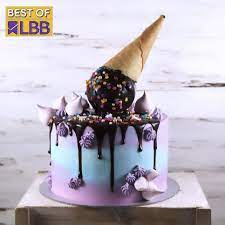
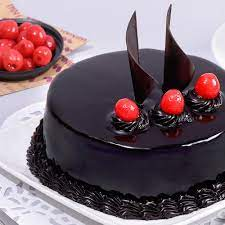
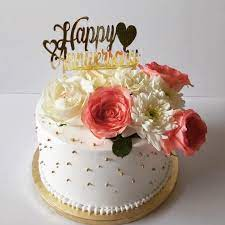
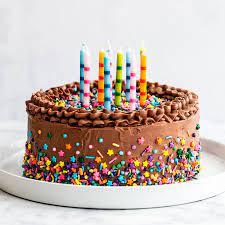
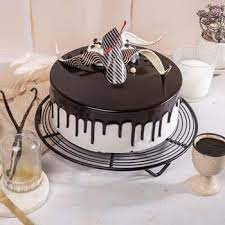
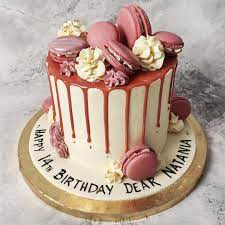
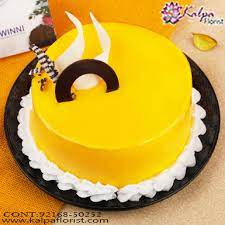
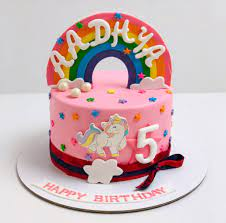
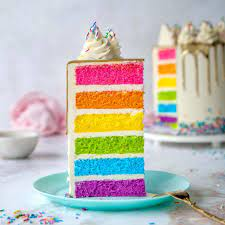
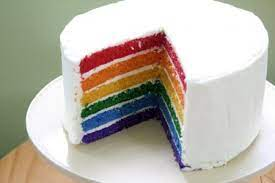

In [93]:
print(f"Top 10 images for '{keyword}':")
for url in image_urls[:10]:
    print(url)

In [94]:
driver.quit()

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps


In [96]:
driver= webdriver.Chrome()

In [97]:
driver.get("https://www.google.co.in/maps")
time.sleep(3)


In [ ]:
city = input('Enter City Name : ')                                         # Enter city to be searched
search = driver.find_element_by_id("searchboxinput")                       # locating search bar
search.clear()                                                             # clearing search bar
time.sleep(2)
search.send_keys(city)                                                     # entering values in search bar
button = driver.find_element_by_id("searchbox-searchbutton")               # locating search button
button.click()                                                             # clicking search button
time.sleep(3)

try:
    url_string = driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page.

In [100]:
driver=webdriver.Chrome()

In [101]:
url4="https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
driver.get(url4)

In [102]:
Brand_Name=[]
Colour=[]
Storage_RAM_ROM=[]
P_F_Camera=[]
Display_size_Resolution=[]
ProcessorAndCores=[]
Battery=[]
Price=[]
Product_URL=[]

In [104]:
BName=driver.find_elements(By.XPATH,"//div[@class='_4rR01T']")
for i in BName:
    if i.text is None :
        Brand_Name.append("--") 
    else:
        Brand_Name.append(i.text)
print(len(Brand_Name),Brand_Name)

24 ['Apple iPhone 15 (Blue, 128 GB)', 'Motorola G34 5G (Ocean Green, 128 GB)', 'Apple iPhone 15 (Black, 128 GB)', 'Motorola G34 5G (Ice Blue, 128 GB)', 'Apple iPhone 15 (Green, 128 GB)', 'Apple iPhone 15 (Pink, 128 GB)', 'vivo T2 5G (Nitro Blaze, 128 GB)', 'vivo T2 5G (Velocity Wave, 128 GB)', 'Motorola G34 5G (Ocean Green, 128 GB)', 'vivo T2 5G (Nitro Blaze, 128 GB)', 'Motorola g54 5G (Midnight Blue, 128 GB)', 'vivo T2 5G (Velocity Wave, 128 GB)', 'Motorola g54 5G (Mint Green, 128 GB)', 'Motorola g54 5G (Mint Green, 256 GB)', 'SAMSUNG Galaxy F04 (Opal Green, 64 GB)', 'POCO C51 (Royal Blue, 64 GB)', 'Motorola Edge 40 Neo (Caneel Bay, 128 GB)', 'POCO M6 5G (Orion Blue, 128 GB)', 'Motorola Edge 40 Neo (Black Beauty, 128 GB)', 'Apple iPhone 14 (Midnight, 128 GB)', 'Motorola G34 5G (Charcoal Black, 128 GB)', 'Motorola Edge 40 Neo (Soothing Sea, 128 GB)', 'Motorola g54 5G (Midnight Blue, 256 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)']


In [105]:
ram=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[1]")
for i in ram:
    if i.text is None :
        Storage_RAM_ROM.append("--") 
    else:
        Storage_RAM_ROM.append(i.text)
print(len(Storage_RAM_ROM),Storage_RAM_ROM)

24 ['128 GB ROM', '8 GB RAM | 128 GB ROM', '128 GB ROM', '8 GB RAM | 128 GB ROM', '128 GB ROM', '128 GB ROM', '8 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '4 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '12 GB RAM | 256 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM']


In [107]:
PC=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[3]")
for i in PC:
    if i.text is None :
        P_F_Camera.append("--") 
    else:
        P_F_Camera.append(i.text)
print(len(P_F_Camera),P_F_Camera)

24 ['48MP + 12MP | 12MP Front Camera', '50MP + 2MP | 16MP Front Camera', '48MP + 12MP | 12MP Front Camera', '50MP + 2MP | 16MP Front Camera', '48MP + 12MP | 12MP Front Camera', '48MP + 12MP | 12MP Front Camera', '64 MP (OIS) + 2MP | 16MP Front Camera', '64 MP (OIS) + 2MP | 16MP Front Camera', '50MP + 2MP | 16MP Front Camera', '64 MP (OIS) + 2MP | 16MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '64 MP (OIS) + 2MP | 16MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '13MP + 2MP | 5MP Front Camera', '8MP Dual Rear Camera | 5MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP Rear Camera', '50MP + 13MP | 32MP Front Camera', '12MP + 12MP | 12MP Front Camera', '50MP + 2MP | 16MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '50MP + 2MP | 8MP Front Camera']


In [108]:
DS=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[2]")
for i in DS:
    if i.text is None :
        Display_size_Resolution.append("--") 
    else:
        Display_size_Resolution.append(i.text)
print(len(Display_size_Resolution),Display_size_Resolution)

24 ['15.49 cm (6.1 inch) Super Retina XDR Display', '16.51 cm (6.5 inch) HD+ Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '16.51 cm (6.5 inch) HD+ Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '16.21 cm (6.38 inch) Full HD+ Display', '16.21 cm (6.38 inch) Full HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '16.21 cm (6.38 inch) Full HD+ Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.21 cm (6.38 inch) Full HD+ Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.51 cm (6.5 inch) HD Display', '16.56 cm (6.52 inch) HD+ Display', '16.64 cm (6.55 inch) Full HD+ Display', '17.12 cm (6.74 inch) HD+ Display', '16.64 cm (6.55 inch) Full HD+ Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '16.51 cm (6.5 inch) HD+ Display', '16.64 cm (6.55 inch) Full HD+ Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display']


In [110]:
P=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[5]")
for i in P:
    if i.text is None :
        ProcessorAndCores.append("--") 
    else:
        ProcessorAndCores.append(i.text)
print(len(ProcessorAndCores),ProcessorAndCores)

24 ['1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Snapdragon 695 5G Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Snapdragon 695 5G Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Snapdragon 695 Processor', 'Snapdragon 695 Processor', 'Snapdragon 695 5G Processor', 'Snapdragon 695 Processor', 'Dimensity 7020 Processor', 'Snapdragon 695 Processor', 'Dimensity 7020 Processor', 'Dimensity 7020 Processor', 'Mediatek Helio P35 Processor', 'Helio G36 Processor', 'Dimensity 7030 Processor', 'Mediatek Dimensity 6100+ Processor', 'Dimensity 7030 Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Snapdragon 695 5G Processor', 'Dimensity 7030 Processor', 'Dimensity 7020 Processor', 'Mediatek Dimensity 6020 Processor']


In [112]:
B=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[4]")
for i in B:
    if i.text is None :
        Battery.append("--") 
    else:
        Battery.append(i.text)
print(len(Battery),Battery)


24 ['A16 Bionic Chip, 6 Core Processor Processor', '5000 mAh Battery', 'A16 Bionic Chip, 6 Core Processor Processor', '5000 mAh Battery', 'A16 Bionic Chip, 6 Core Processor Processor', 'A16 Bionic Chip, 6 Core Processor Processor', '4500 mAh Battery', '4500 mAh Battery', '5000 mAh Battery', '4500 mAh Battery', '6000 mAh Battery', '4500 mAh Battery', '6000 mAh Battery', '6000 mAh Battery', '5000 mAh Lithium-Ion Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', 'A15 Bionic Chip, 6 Core Processor Processor', '5000 mAh Battery', '5000 mAh Battery', '6000 mAh Battery', '5000 mAh Battery']


In [114]:
price=driver.find_elements(By.XPATH,"//div[@class='_30jeq3 _1_WHN1']")
for i in price:
    if i.text is None :
        Price.append("--") 
    else:
        Price.append(i.text)
print(len(Price),Price)

24 ['₹65,999', '₹11,999', '₹65,999', '₹11,999', '₹65,999', '₹66,999', '₹17,999', '₹15,999', '₹10,999', '₹15,999', '₹13,999', '₹17,999', '₹13,999', '₹15,999', '₹5,999', '₹5,499', '₹22,999', '₹9,499', '₹22,999', '₹56,999', '₹11,999', '₹22,999', '₹15,999', '₹14,999']


In [115]:
FlipKart=pd.DataFrame([])
FlipKart['Brand_Name']=Brand_Name
FlipKart['Storage_RAM_ROM']=Storage_RAM_ROM
FlipKart['Amount P_F_Camera']=P_F_Camera
FlipKart['Display_size_Resolution']=Display_size_Resolution
FlipKart['ProcessorAndCores']=ProcessorAndCores
FlipKart['Battery']=Battery
FlipKart['Price']=Price

FlipKart

,Brand_Name,Storage_RAM_ROM,Amount P_F_Camera,Display_size_Resolution,ProcessorAndCores,Battery,Price
0,"Apple iPhone 15 (Blue, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A16 Bionic Chip, 6 Core Processor Processor","₹65,999"
1,"Motorola G34 5G (Ocean Green, 128 GB)",8 GB RAM | 128 GB ROM,50MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,Snapdragon 695 5G Processor,5000 mAh Battery,"₹11,999"
2,"Apple iPhone 15 (Black, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A16 Bionic Chip, 6 Core Processor Processor","₹65,999"
3,"Motorola G34 5G (Ice Blue, 128 GB)",8 GB RAM | 128 GB ROM,50MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,Snapdragon 695 5G Processor,5000 mAh Battery,"₹11,999"
4,"Apple iPhone 15 (Green, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A16 Bionic Chip, 6 Core Processor Processor","₹65,999"
5,"Apple iPhone 15 (Pink, 128 GB)",128 GB ROM,48MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A16 Bionic Chip, 6 Core Processor Processor","₹66,999"
6,"vivo T2 5G (Nitro Blaze, 128 GB)",8 GB RAM | 128 GB ROM,64 MP (OIS) + 2MP | 16MP Front Camera,16.21 cm (6.38 inch) Full HD+ Display,Snapdragon 695 Processor,4500 mAh Battery,"₹17,999"
7,"vivo T2 5G (Velocity Wave, 128 GB)",6 GB RAM | 128 GB ROM,64 MP (OIS) + 2MP | 16MP Front Camera,16.21 cm (6.38 inch) Full HD+ Display,Snapdragon 695 Processor,4500 mAh Battery,"₹15,999"
8,"Motorola G34 5G (Ocean Green, 128 GB)",4 GB RAM | 128 GB ROM,50MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,Snapdragon 695 5G Processor,5000 mAh Battery,"₹10,999"
9,"vivo T2 5G (Nitro Blaze, 128 GB)",6 GB RAM | 128 GB ROM,64 MP (OIS) + 2MP | 16MP Front Camera,16.21 cm (6.38 inch) Full HD+ Display,Snapdragon 695 Processor,4500 mAh Battery,"₹15,999"


Q:5.Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 


In [164]:
driver = webdriver.Chrome()

In [169]:
driver.get("https://www.google.co.in/maps")
time.sleep(3)

city = input('Enter City Name : ')                                         # Enter city to be searched
search = driver.find_element(By.ID,"searchboxinput")                       # locating search bar
search.clear()                                                             # clearing search bar
time.sleep(2)
search.send_keys(city)                                                     # entering values in search bar
button = driver.find_element(By.ID,"searchbox-searchbutton")               # locating search button
button.click()                                                             # clicking search button
time.sleep(3)


try:
    url_string = driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

Enter City Name : Gwalior
URL Extracted:  https://www.google.co.in/maps/place/Gwalior,+Madhya+Pradesh/@12.9531904,77.6667136,12z/data=!4m6!3m5!1s0x3976c5d1792291fb:0xff4fb56d65bc3adf!8m2!3d26.2124007!4d78.1772053!16zL20vMDE5Nl9o?entry=ttu
Latitude = 12.9531904, Longitude = 77.6667136


Q.6 Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [216]:
driver = webdriver.Chrome()

In [217]:
driver.get("https://www.digit.in/top-products/best-gaming-laptops-40.html")

In [218]:
Brands=[]
Products_Description=[]
Specification=[]
Price=[]

In [220]:
br=driver.find_elements(By.XPATH,"//div[@class='TopNumbeHeading active sticky-footer']")
len(br)

0

In [221]:
for i in br:
   
    Brands.append(str(i.text).replace("\n",""))
Brands

[]

In [223]:
sp=driver.find_elements(By.XPATH,"//div[@class='Specs-Wrap']")
len(sp)

0

In [224]:
for i in sp:
   
    Specification.append(str(i.text).replace("\n",""))
Specification

[]

In [226]:
des=driver.find_elements(By.XPATH,"//div[@class='Section-center']")
len(des)

0

In [227]:
for i in des:
   
    Products_Description.append(str(i.text).replace("\n",""))
Products_Description

[]

In [229]:
pri=driver.find_elements(By.XPATH,"//td[@class='smprice']")
len(pri)

0

In [230]:
for i in pri:
   
    Price.append(str(i.text).replace("\n",""))
Price

[]

In [231]:
digit_lap=pd.DataFrame([])
digit_lap['Brands']=Brands[0:10]
digit_lap['Price']=Price[0:10]
digit_lap['Specification']=Specification[0:10]
digit_lap['Description']=Products_Description[0:10]
digit_lap

,Brands,Price,Specification,Description


Q7.Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [277]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC


driver = webdriver.Chrome()


url = "https://www.forbes.com/billionaires/"
driver.get(url)

# Wait for the page to load
WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CLASS_NAME, "data")))

# Get data from each billionaire
billionaires = driver.find_elements(By.CLASS_NAME,"data")

for billionaire in billionaires:
    rank = billionaire.find_element(By.CLASS_NAME,"rank").text
    name = billionaire.find_element(By.CLASS_NAME,"personName").text
    net_worth = billionaire.find_element(By.CLASS_NAME,"netWorth").text
    age = billionaire.find_element(By.CLASS_NAME,"age").text
    citizenship = billionaire.find_element(By.CLASS_NAME,"countryOfCitizenship").text
    source = billionaire.find_element(By.CLASS_NAME,"source").text
    industry = billionaire.find_element(By.CLASS_NAME,"category").text

    # Print or store the data as needed
    print(f"Rank: {rank}")
    print(f"Name: {name}")
    print(f"Net Worth: {net_worth}")
    print(f"Age: {age}")
    print(f"Citizenship: {citizenship}")
    print(f"Source: {source}")
    print(f"Industry: {industry}")
    print("\n")

# Close the webdriver
driver.quit()


TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00891673+52979]
	(No symbol) [0x00817961]
	(No symbol) [0x006FDD3D]
	(No symbol) [0x00735FBB]
	(No symbol) [0x007360FB]
	(No symbol) [0x0076CF92]
	(No symbol) [0x00754534]
	(No symbol) [0x0076B3FE]
	(No symbol) [0x00754286]
	(No symbol) [0x0072C063]
	(No symbol) [0x0072CECD]
	GetHandleVerifier [0x00BA8D83+3294723]
	GetHandleVerifier [0x00BE6CC2+3548482]
	GetHandleVerifier [0x00BE1C9C+3527964]
	GetHandleVerifier [0x0092870E+671630]
	(No symbol) [0x00821EB4]
	(No symbol) [0x0081D808]
	(No symbol) [0x0081D92D]
	(No symbol) [0x0080F7E0]
	BaseThreadInitThunk [0x766800F9+25]
	RtlGetAppContainerNamedObjectPath [0x77767BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77767B8E+238]


Q:8.Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted
from any YouTube Video. 

In [232]:
driver=webdriver.Chrome()

In [234]:
driver.get('https://www.youtube.com/watch?v=9cfyLNH2SGk&list=RD9cfyLNH2SGk&start_radio=1')

In [235]:
scroll_pause_time = 2 

In [236]:
scrolls = 10

In [237]:
for _ in range(scrolls):
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(scroll_pause_time)

In [239]:
comments = driver.find_elements(By.XPATH,'//yt-formatted-string[@id="content-text"]')
upvotes = driver.find_elements(By.XPATH,'//span[@id="vote-count-middle"]')
times = driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')


In [240]:
extracted_data = []
for comment, upvote, time in zip(comments, upvotes, times):
    extracted_data.append({'comment': comment.text,'upvote': upvote.text,'time': time.text })

In [241]:
driver.quit()

In [242]:
for data in extracted_data:
    print(data)

Q:9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall
reviews, privates from price, dorms from price, facilities and property description

In [274]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import StaleElementReferenceException 
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver = webdriver.Chrome()


url = "https://www.hostelworld.com/"
driver.get(url)


search_box = driver.find_element(By.ID, "home-search-keywords")
search_box.send_keys("London")
search_box.submit()

WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "property-card")))

hostels = driver.find_elements(By.CLASS_NAME,"property-card")

for hostel in hostels:
    name = hostel.find_element(By.CLASS_NAME,"property-card-title").text
    distance = hostel.find_element(By.CLASS_NAME,"property-card-latitude").text
    rating = hostel.find_element(By.CLASS_NAME,"score").text
    total_reviews = hostel.find_element(By.CLASS_NAME,"reviews").text
    privates_price = hostel.find_element(By.CLASS_NAME,"price").text
    dorms_price = hostel.find_element(By.CLASS_NAME,"price").text
    facilities = ', '.join([elem.text for elem in hostel.find_elements(By.CLASS_NAME,"facilities")])
    description = hostel.find_element(By.CLASS_NAME,"property-card-text").text

    print(f"Name: {name}")
    print(f"Distance: {distance}")
    print(f"Rating: {rating}")
    print(f"Total Reviews: {total_reviews}")
    print(f"Privates from Price: {privates_price}")
    print(f"Dorms from Price: {dorms_price}")
    print(f"Facilities: {facilities}")
    print(f"Description: {description}")
    print("\n")

driver.quit()


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="home-search-keywords"]"}
  (Session info: chrome=121.0.6167.161); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00891673+52979]
	(No symbol) [0x00817961]
	(No symbol) [0x006FDD3D]
	(No symbol) [0x00735FBB]
	(No symbol) [0x007360FB]
	(No symbol) [0x0076CF92]
	(No symbol) [0x00754534]
	(No symbol) [0x0076B3FE]
	(No symbol) [0x00754286]
	(No symbol) [0x0072C063]
	(No symbol) [0x0072CECD]
	GetHandleVerifier [0x00BA8D83+3294723]
	GetHandleVerifier [0x00BE6CC2+3548482]
	GetHandleVerifier [0x00BE1C9C+3527964]
	GetHandleVerifier [0x0092870E+671630]
	(No symbol) [0x00821EB4]
	(No symbol) [0x0081D808]
	(No symbol) [0x0081D92D]
	(No symbol) [0x0080F7E0]
	BaseThreadInitThunk [0x766800F9+25]
	RtlGetAppContainerNamedObjectPath [0x77767BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77767B8E+238]
